# **Taller No. 3: Segmentación por agrupamiento (*clustering*)**

## **Autores**: 
- Vivian Natalia Gómez Cubillos 
- Kelly Katherine Penaranda Rivera

# **Contenido**
1. [**Introducción**](#id1)
2. [**Método**](#id2)
3. [**Código**](#id3)
4. [**Resultados**](#id4)
5. [**Conclusión y discusión**](#id5)


## **1. Introducción**<a name="id1"></a>
En el presente trabajo se seleccionó un conjunto de imágenes de diferentes características, tales como dimensiones, paletas de colores y composiciones. Cada una de ellas tenía un determinado objeto que queríamos resaltar o segmentar como se describe a continuación:

- [Pez payaso en el agua](https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/d.jpg): El objetivo era que se  resaltara la figura del pez, sin perder las rayas que lo caracterizan, y separandolo del fondo.
- [Aves volando en el atardecer](https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/c.jpg): El objetivo de esta segmentación era resaltar la silueta de las aves que se muestran en la imagen.
- [Conejo](https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/b.jpg): Al aplicar una segmentación sobre esta imagen se esperaba obtener al conejo.
- [Elefantes](https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/a.jpg): El objetivo era resaltar la figura de los elefantes, separandolos del fondo.

## **2. Método**<a name="id2"></a>

## **3. Código**<a name="id3"></a>

## **4. Resultados**<a name="id4"></a>
Tras aplicar el algoritmo implementado y descrito en la sección anterior, obtuvimos los siguientes resultados para cada imagen seleccionada:

### [Pez payaso en el agua](https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/d.jpg):

En este caso, dado el objetivo de segmentación, usamos un k=3, de modo que se generaran 3 grupos en la imagen segmentada. 

Hicimos dos experimentaciones, para comparar los resultados de inicializar los centroides de manera estratégica y de manera aleatoria.

Para la primera, inicializamos los centroides con los colores de cada grupo que queríamos segmentar. Para ellos, usando una herramienta de edición de imágenes,  escogimos un color de cada región que queríamos resaltar (uno del color naranja del pez, otro de las franjas blancas y el último con un tono verde oscuro del fondo). Por otro lado, el criterio para mover los clusters fue asignar cada pixel al grupo de su color más cercano, usando la función explicada en detalle en la sección Método. De este modo, se agruparon todos los píxeles en los grupos de cada color de nuestro interés. Finalmente, para el criterio de convergencia, usamos un máximo de 25 iteraciones y un umbral de 15, de modo que al comparar las dos últimas iteraciones si los centroides se mueven por debajo de la distancia umbral seleccionada, se establece que hay convergencia y se detiene el algoritmo, pues de esta manera sabemos que los centroides de dichas iteraciones son “virtualmente iguales”.

En particular, el umbral se determinó de manera experimental, hicimos 4 pruebas con diferentes umbrales y la misma inicialización de los centroides. Como se muestra a continuación:


![ ](https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/Comparacion%20Pez.PNG)

De lo anterior, seleccionamos como mejor resultado el correspondiente a la selección del umbral 15, puesto que segmentaba la región que queríamos (pez con sus franjas) y eliminaba, más que umbral 1 y 15, la información de lo que parece ser una “soga” en el fondo de la imágen. Adicionalmente, notamos que se realizó un menor número de iteraciones cuando se aumentó el umbral, esto se debe a que se cumple más rápidamente el criterio de convergencia ya explicado. El proceso para obtener la imagen resultante se muestra a continuación.

In [2]:
import utils.segmentation as seg
import utils.visualization as vis
import matplotlib.pyplot as plt
from skimage import color

In [7]:
url1 = "https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/d.jpg"
img1 = seg.download_image(url1)

The shape of the image is: (326, 540, 3)


In [9]:
resA1 = seg.kmeans(3, img1, 25, 30, False, [(255, 161, 8), (247, 251, 252), (42, 65, 59)])

C  [(255, 161, 8), (247, 251, 252), (42, 65, 59)]
Iteracion actual -> 1
Iteracion actual -> 2


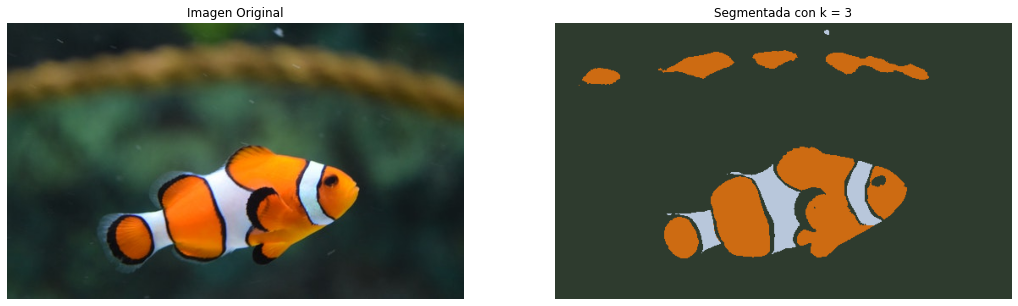

In [12]:
vis.visualize_subplot([img1, resA1],
                      ["Imagen Original", "Segmentada con k = 3"], (1, 2), figsize=(18, 6))

Adicionalemente, para comparar los resultados de esta instanciación de kmeans, con los centroides inicializados manualmente y evaluar su desempeño de manera cuantitativa. Graficamos el histograma de la imagen resultado, y obtuvimos que hay 3 picos, correspondientes a cada valor R,G,B del centroide final. En particular, hay un pico mucho más alto que los otros dos, el cual tiene mayor frcuencia de aparición y corresponde al fondo de la imagen resultado, mientras los pequeños corresponden a nuestro objetivo de segmentación. Por lo tanto, podemos decir, que la segmentación fue bastante buena, bues se logró separar la región objetivo del fondo

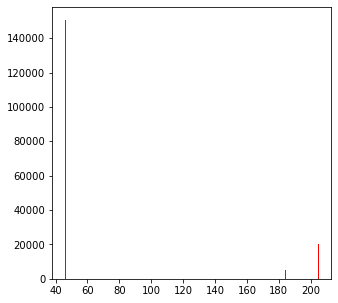

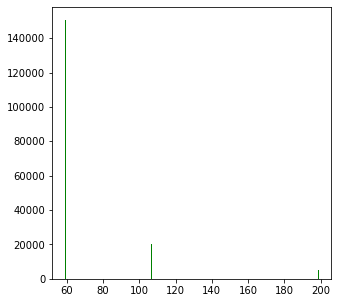

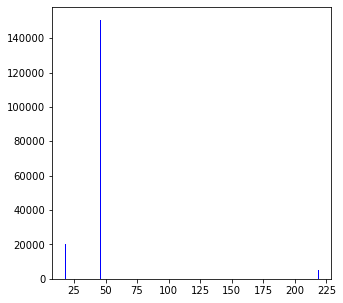

In [38]:
img_redA1 = resA1[:, :, 0]
img_greenA1 = resA1[:, :, 1]
img_blueA1 = resA1[:, :, 2]

plt.figure(figsize=(5, 5))
plt.hist(img_redA1.ravel(), bins=256, color="r")
plt.show()

plt.figure(figsize=(5, 5))
plt.hist(img_greenA1.ravel(), bins=256, color="g")
plt.show()

plt.figure(figsize=(5, 5))
plt.hist(img_blueA1.ravel(), bins=256, color="b")
plt.show()

También hicimos el proceso con 3 clusters, inicializando los centroides aleatoriamente y utilizando el umbral 15. Sin embargo, el resultado fue drásticamente menor. Esto se debe a que los centroides no tomarían en cuenta el tono blanco de las franjas, sino posiblemente otro valor, que al promediarse quedaría más cercano al del fondo.

In [14]:
resA2 = seg.kmeans(3, img1, 25, 15, True, [])

Coordenadas aleatorias  132 199
Pixel  [56 77 60]
Coordenadas aleatorias  301 516
Pixel  [20 41 42]
Coordenadas aleatorias  105 192
Pixel  [30 42 40]
C  [(56, 77, 60), (20, 41, 42), (30, 42, 40)]
Iteracion actual -> 1
Iteracion actual -> 2
Iteracion actual -> 3
Iteracion actual -> 4
Iteracion actual -> 5


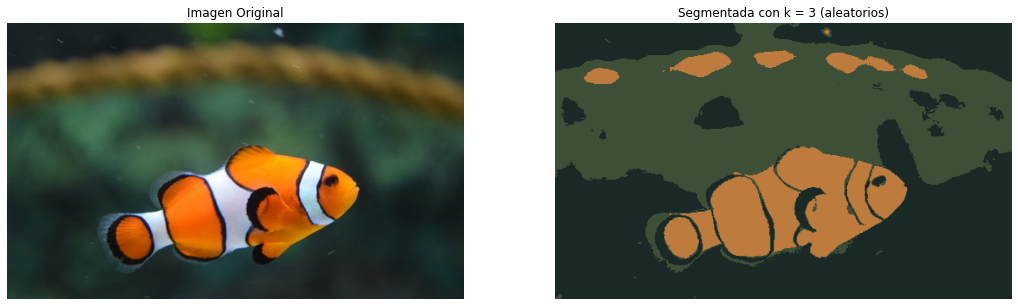

In [16]:
vis.visualize_subplot([img1, resA2],
                      ["Imagen Original", "Segmentada con k = 3 (aleatorios)"], (1, 2), figsize=(18, 6))

Al igual que con la anterior instanciación de kmeans, en este caso también hicimos la graficación del histograma. En particular, como se puede obsevar se obtuvieron los 3 picos de cada centroide, pero, hay dos que tienen una frecuencia de aparición muy similiar. Esto se debe a que uno de los centroides aleatorios tomó un color del fondo y ocupa gran parte de la imagen en un tono verde, similar al otro cluster que es más oscuro. De esta manera, para este caso, podemos establecer que dado nuestro objetivo de segmentación, fue mucho mejor el resultado inicializando los centroides manualmente y no de manera aleatoria.

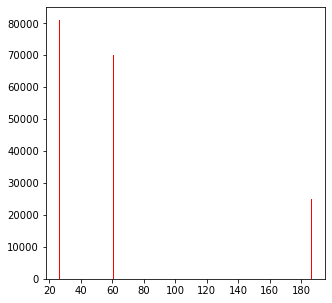

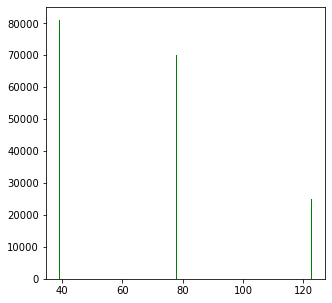

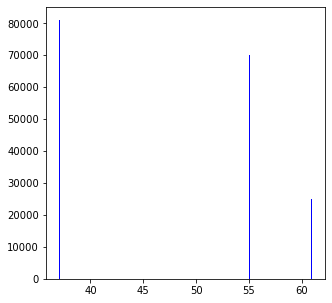

In [39]:
img_redA2 = resA2[:, :, 0]
img_greenA2 = resA2[:, :, 1]
img_blueA2 = resA2[:, :, 2]

plt.figure(figsize=(5, 5))
plt.hist(img_redA2.ravel(), bins=256, color="r")
plt.show()

plt.figure(figsize=(5, 5))
plt.hist(img_greenA2.ravel(), bins=256, color="g")
plt.show()

plt.figure(figsize=(5, 5))
plt.hist(img_blueA2.ravel(), bins=256, color="b")
plt.show()

### [Aves volando en el atardecer](https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/c.jpg): 
En este caso, de acuerdo con el objetivo definido de segmentación, se estableció un k=2 y así poder obtener una imagen de dos colores, diferenciando el color del objetivo de segmentación y el del fondo. 

Al igual que con el pez, hicimos dos experimentaciones, para comparar los resultados de inicializar los centroides de manera estratégica y de manera aleatoria.

Para la primera, inicializamos los centroides con los colores de cada grupo que queríamos segmentar, en este caso, el de los pájaros y uno de los rosados del cielo. Para obtener los colores, de nuevo usamos una herramienta de edición de imágenes, escogimos un color de cada región que queríamos resaltar. Por otro lado, el criterio para mover los clusters fue asignar cada pixel al grupo de su color más cercano, usando la función explicada en detalle en la sección Método. De este modo, se agruparon todos los píxeles en los grupos de cada color de nuestro interés. Finalmente, para el criterio de convergencia, usamos un máximo de 25 iteraciones y un umbral de 30, de modo que al comparar las dos últimas iteraciones si los centroides se mueven por debajo de la distancia umbral seleccionada, se establece que hay convergencia y se detiene el algoritmo, pues de esta manera sabemos que los centroides de dichas iteraciones son “virtualmente iguales”.

En particular, el umbral se determinó de manera experimental, hicimos 4 pruebas con diferentes umbrales y la misma inicialización de los centroides. Como se muestra a continuación:

<img src="https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/ComparacionAves.PNG" alt="drawing" width="600" height="500"/>

De lo anterior, notamos que al seleccionar k = 2, se eliminó la región correspondiente al sol, dado que al hacer el promedio, este se tomó como parte del fondo. Por otro lado, observamos que al variar los umbrales se obtuvo prácticamente el mismo resultado, o por lo menos, no logramos encontrar diferencia cualitativa. Adicionalmente, siempre se hicieron el mismo número de iteraciones (2) en todos los casos. Por lo tanto, decidimos tomar umbral 30, dado que se obtenia el mismo resultado y se cumple más rápido el criterio de convergencia.

In [18]:
url2 = "https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/c.jpg"
img2 = seg.download_image(url2)

The shape of the image is: (263, 400, 3)


In [19]:
resB1 = seg.kmeans(2, img2, 25, 30, False, [(7, 0, 22), (253, 172, 148)])

C  [(7, 0, 22), (253, 172, 148)]
Iteracion actual -> 1
Iteracion actual -> 2


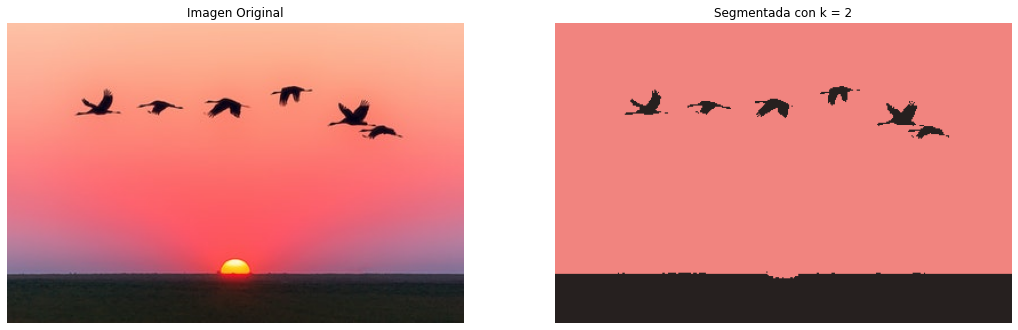

In [20]:
vis.visualize_subplot([img2, resB1],
                      ["Imagen Original", "Segmentada con k = 2"], (1, 2), figsize=(18, 6))

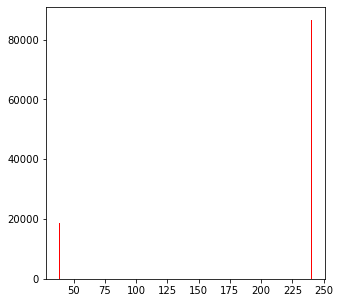

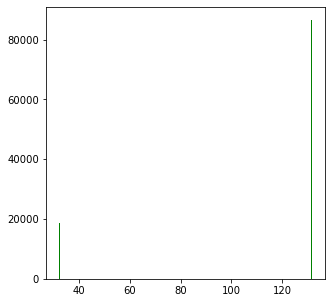

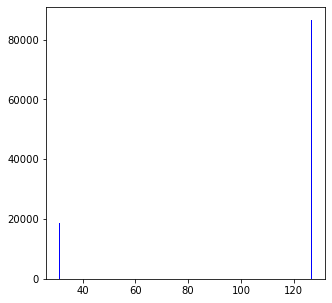

In [40]:
img_redB1 = resB1[:, :, 0]
img_greenB1 = resB1[:, :, 1]
img_blueB1 = resB1[:, :, 2]

plt.figure(figsize=(5, 5))
plt.hist(img_redB1.ravel(), bins=256, color="r")
plt.show()

plt.figure(figsize=(5, 5))
plt.hist(img_greenB1.ravel(), bins=256, color="g")
plt.show()

plt.figure(figsize=(5, 5))
plt.hist(img_blueB1.ravel(), bins=256, color="b")
plt.show()

In [21]:
resB2 = seg.kmeans(2, img2, 25, 30, True, [])

Coordenadas aleatorias  176 37
Pixel  [219 115 140]
Coordenadas aleatorias  15 68
Pixel  [252 185 156]
C  [(219, 115, 140), (252, 185, 156)]
Iteracion actual -> 1
Iteracion actual -> 2
Iteracion actual -> 3
Iteracion actual -> 4
Iteracion actual -> 5


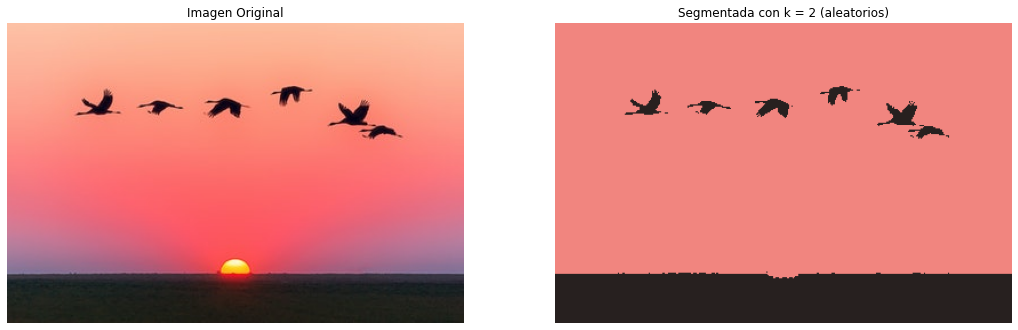

In [22]:
vis.visualize_subplot([img2, resB2],
                      ["Imagen Original", "Segmentada con k = 2 (aleatorios)"], (1, 2), figsize=(18, 6))

De nuevo, hicimos el proceso inicializando los dos centroides de manera aleatoria y en este caso, obtuvimos el mismo resultado que con la inicialización manual. Esto se debe a que la imagen original contaba con unos colores dominantes y el correspondiente al sol, tenía una frecuencia de aparición baja, con respecto al del cielo, las aves y el "piso". Por lo cual, al hacer la selección aleatoria se debió tomar un pixel con el color del cielo y otro con el de las aves/piso. 

En particular, lo anterior se puede observar en los histogramas de cada imagen resultado, cuyos valores son iguales.

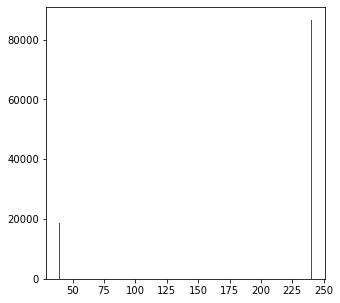

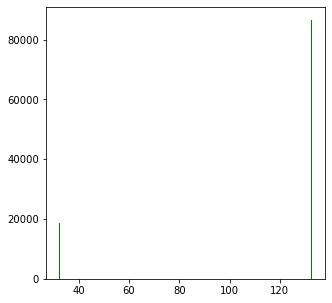

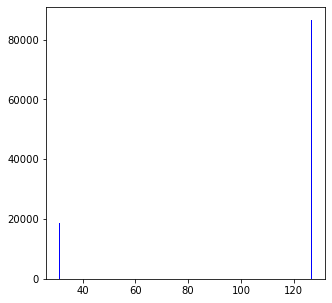

In [37]:
img_redB2 = resB2[:, :, 0]
img_greenB2 = resB2[:, :, 1]
img_blueB2 = resB2[:, :, 2]

plt.figure(figsize=(5, 5))
plt.hist(img_redB2.ravel(), bins=256, color="r")
plt.show()

plt.figure(figsize=(5, 5))
plt.hist(img_greenB2.ravel(), bins=256, color="g")
plt.show()

plt.figure(figsize=(5, 5))
plt.hist(img_blueB2.ravel(), bins=256, color="b")
plt.show()

### [Conejo](https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/b.jpg):

En este caso, seleccionamos como objetivo de segmentación el conejo. En particular, las características de esta imagen son interesantes debido a que tiene unos colores principales, como son el amarillo del fondo, el blanco del conejo y algunas partes grises. Sin embargo, en varias regiones, los colores se mezclan como una rampa, en especial, entre la pata izquierda del conejo y el fondo. Adicionalmente, el conejo tiene unas gafas cuyo lente es de un color similar al fondo y con marco transparente. 

Con lo anterior en mente, y siguiendo el método que veníamos manejando, lo ideal sería seleccionar un k=3 con los colores descritos. Sin embargo decidimos en este caso probar tanto con k=2, como con k=3, dado que el tercer color descrito anteriormente cuenta con una pequeña frecuencia de aparición respecto a los otros dos. Adicionalmente, por cada k establecido, se cambió el valor del umbral para probar de manera experimental cuál era el valor ideal para obtener el mejor resultado. 

En el caso de k = 2, variando el umbral con los valores 1, 5, 15, 30, obtuvimos los siguientes resultados:

<img src="https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/comparacionConejo1.PNG" alt="drawing" width="400" height="250"/>

Como se puede observar, los resultados fueron muy similares, casi iguales, pero en el caso de umbral 1 y 5 las imágenes se ven un poco más claras, mientras en 15 y 30 se ven más oscuras. De esta manera, decidimos seleccionar el umbral 5, pues daba una imagen clara y en menos iteraciones que 1. 

In [3]:
url3 = "https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/b.jpg"
img3 = seg.download_image(url3)

The shape of the image is: (552, 529, 3)


In [4]:
resC1 = seg.kmeans(2, img3, 25, 5, False, [(230, 221, 190), (249, 227, 115)])

C  [(230, 221, 190), (249, 227, 115)]
Iteracion actual -> 1
Iteracion actual -> 2
Iteracion actual -> 3


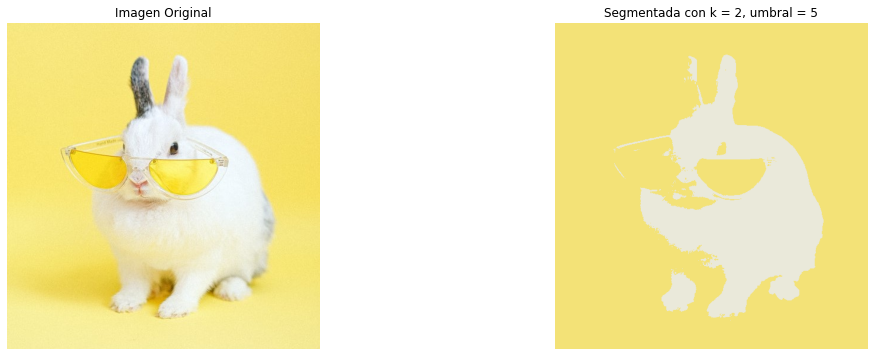

In [25]:
vis.visualize_subplot([img3, resC1],
                      ["Imagen Original", "Segmentada con k = 2, umbral = 5"], (1, 2), figsize=(18, 6))


Por otro lado, en el caso de k = 3, hicimos la misma variación obtuvimos las imágenes que se muestran a continuación:

<img src="https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/comparacionConejo2.PNG" alt="drawing" width="450" height="250"/>

En este caso, con k = 3, observamos que todas las imágenes son iguales, no observamos diferencias notorias. Por lo cual, nos decidimos por el umbral 30, que da el mismo resultado en el menor número de iteraciones.

In [23]:
resC2 = seg.kmeans(3, img3, 25, 30, False, [(230, 221, 190), (249, 227, 115), (132, 140, 147)])

C  [(230, 221, 190), (249, 227, 115), (132, 140, 147)]
Iteracion actual -> 1
Iteracion actual -> 2


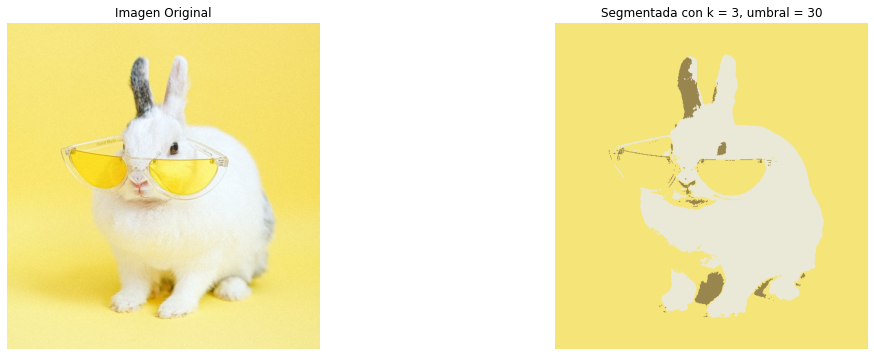

In [26]:
vis.visualize_subplot([img3, resC2],
                      ["Imagen Original", "Segmentada con k = 3, umbral = 30"], (1, 2), figsize=(18, 6))

En este caso, notamos que la segmentación no fue tan buena como con las imágenes anteriores (pez, aves). En primer lugar, con k=2, se perdía información de una parte de la oreja, la pata izquierda e incluso de la cara, pues esta quedó en el cluster de color amarillo. Adicionalmente, sólo se resaltó en color blanco el pelaje. En particular, esto se debe a que al usar dos clusters, se agruparon los pixeles en el color amarillo del fondo y el blanco del pelaje, pues inicializamos los centroides con dichos valores y al ser los que presentaban mayor frecuencia en la imagen original, se resaltaron como grupos en la imagen resultado, perdiendo la información del color gris oscuro. 

Por otro lado, con k=3, observamos que ya hay apariciones de la tonalidad de gris que se perdía en k=2, permitiendo resaltar los detalles de la oreja, el ojo, la nariz y la boca, e incluso un poco del contorno de los lendes de las gafas. En particular, esto se debe a que inicializamos los dos primeros centroides con los mismos valores que en k=2, pero el tercero con el color gris de la oreja. Así pues, los grupos resultantes fueron amarillo, blanco y gris oscuro. Sin embargo, aún observamos que se perdió un poco de información de la cara, la pata izquierda y el marco de los lentes. Esto último lo

### [Elefantes](https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/a.jpg):

In [15]:
url4 = "https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/a.jpg"
img4 = seg.download_image(url4)

The shape of the image is: (320, 500, 3)


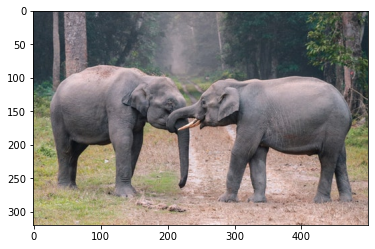

In [16]:
plt.imshow(img4)
plt.show()

Coordenadas aleatorias  29 192
Pixel  [111 114 123]
Coordenadas aleatorias  107 366
Pixel  [198 178 180]
Coordenadas aleatorias  197 307
Pixel  [99 93 97]
C  [(111, 114, 123), (198, 178, 180), (99, 93, 97)]
Iteracion actual -> 1
Iteracion actual -> 2


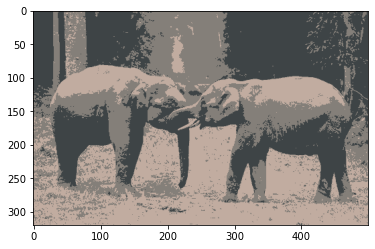

[(132, 127, 121), (193, 172, 160), (62, 68, 70)]

In [17]:
seg.kmeans(3, img4, 25, 5, True, [])

C  [(120, 120, 129), (181, 158, 151), (76, 97, 72)]
Iteracion actual -> 1
Iteracion actual -> 2
Iteracion actual -> 3


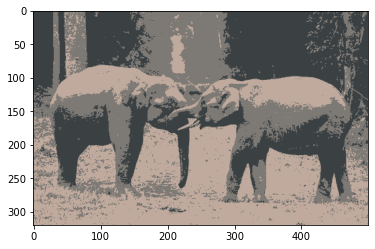

[(125, 121, 117), (191, 170, 157), (59, 65, 67)]

In [18]:
seg.kmeans(3, img4, 25, 1, False, [(120, 120, 129), (181, 158, 151), (76, 97, 72)])

## **5. Conclusión y discusión**<a name="id5"></a>